In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

# **Read the file and choose 'Date' as index**

In [4]:
df_stock = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MSFT_historical_data_yfinance.csv')
df_stock['Date'] = pd.to_datetime(df_stock['Date'])
df_stock.set_index('Date', inplace=True)
df_stock.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-12-07,368.230011,371.450012,366.320007,370.950012,23118900
2023-12-08,369.200012,374.459991,368.230011,374.230011,20144800
2023-12-11,368.480011,371.600006,366.100006,371.299988,27708800
2023-12-12,370.850006,374.420013,370.459991,374.380005,24793900
2023-12-13,376.019989,377.636108,375.079987,375.880188,4696314


# **Visualize the close prices of the dataset**

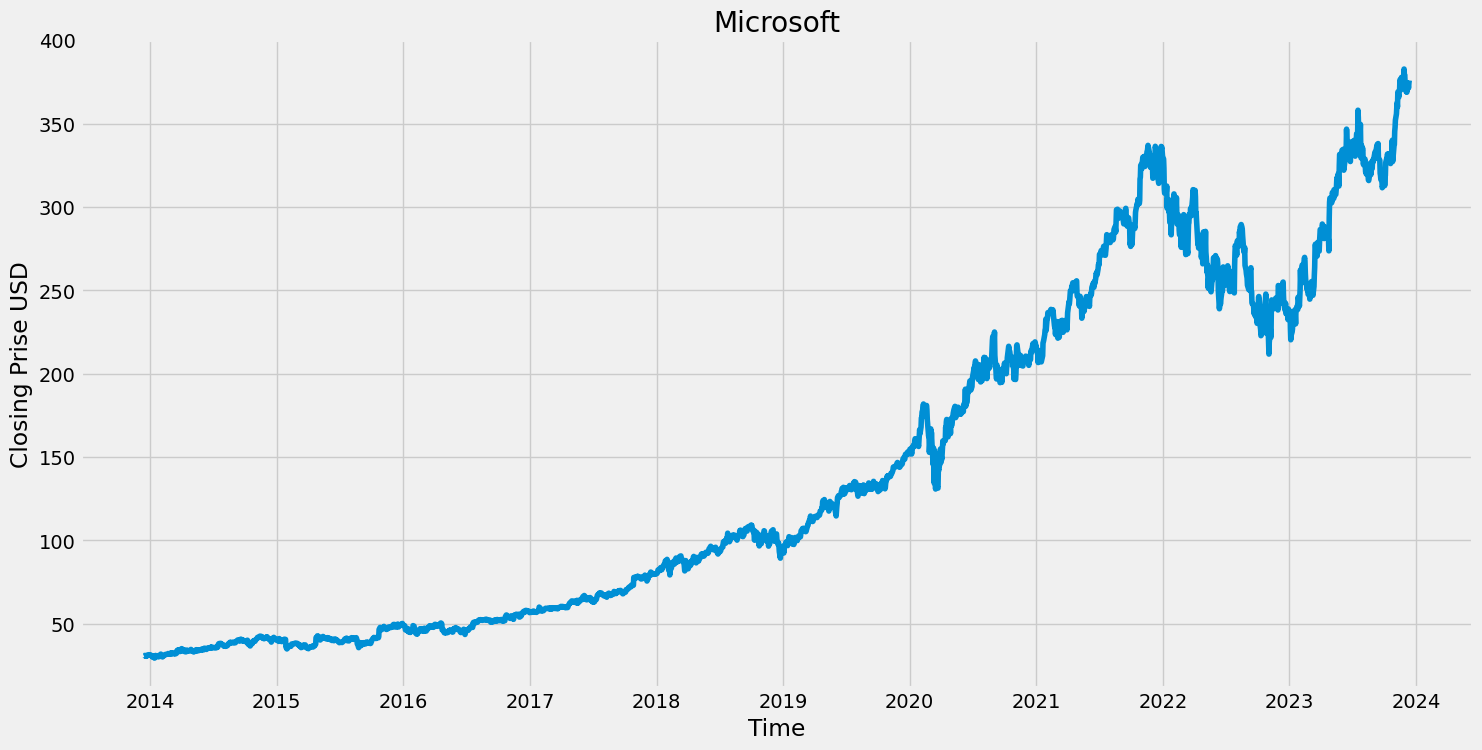

In [5]:
plt.figure(figsize=(16,8))
plt.title('Microsoft')
plt.xlabel('Time')
plt.ylabel('Closing Prise USD')
plt.plot(df_stock['Close'])
plt.show()

# **Model**

**1. Predict 20% of days into the future and create featur, label**

In [6]:
# Predicting 20% days into the future.
future_days = math.ceil(df_stock.shape[0]*0.2)
df_prediction = df_stock[['Open','High','Low','Close']]
df_prediction = pd.DataFrame(df_prediction)
df_prediction['Prediction'] = df_prediction['Close'].shift(-future_days)
X = np.array(df_prediction.drop(['Prediction'], axis=1))[:-future_days]
print(X)
y = np.array(df_prediction['Prediction'])[:-future_days]
print(y)

[[ 31.50976254  31.53502643  30.83611778  30.89506149]
 [ 30.9287324   31.15608803  30.76874284  31.0634613 ]
 [ 31.10556186  31.24871312  30.59191016  30.75189972]
 ...
 [329.27760522 329.46418943 324.84873276 328.94372559]
 [328.39376021 330.43632654 326.14495034 327.10733032]
 [328.95348406 336.82918781 328.7668999  336.37747192]]
[ 49.05435181  49.88082123  49.49868774 ... 371.29998779 374.38000488
 375.88018799]


**2. Split the dataset into train set and test set and implement Decision Tree**

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
x_future = df_prediction.drop(['Prediction'], axis=1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[146.13569686, 147.86061712, 145.52861492, 147.66789246],
       [147.43661525, 149.2578905 , 147.27279855, 148.91098022],
       [149.46990755, 150.23117518, 149.19045897, 149.87463379],
       ...,
       [329.27760522, 329.46418943, 324.84873276, 328.94372559],
       [328.39376021, 330.43632654, 326.14495034, 327.10733032],
       [328.95348406, 336.82918781, 328.7668999 , 336.37747192]])

In [8]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[333.29403687 322.4329834  328.62942505 319.05490112 317.97467041
 314.15463257 321.40188599 321.40188599 328.66876221 336.28918457
 308.85073853 335.79815674 333.2154541  330.26940918 328.72766113
 333.2154541  328.72766113 328.72766113 308.39025879 308.61611938
 309.31332397 312.54415894 299.31646729 304.61935425 290.70425415
 297.87289429 296.17404175 290.70425415 291.03811646 308.39025879
 304.61935425 290.70425415 302.7142334  305.38531494 277.55831909
 307.82064819 295.83035278 300.43597412 295.5357666  299.08081055
 305.6111145  269.50531006 289.7321167  289.69274902 250.60719299
 294.72000122 286.08996582 283.33459473 283.12799072 275.79684448
 283.02960205 292.56491089 294.02130127 290.24258423 283.12799072
 291.19711304 285.23379517 274.45855713 271.44741821 283.89553833
 281.03198242 275.60009766 271.44741821 282.56704712 295.63510132
 290.50827026 295.63510132 294.38540649 299.20721436 332.79318237
 299.24658203 303.38937378 299.24658203 271.44741821 308.85073853
 303.38937

In [9]:
predictions = tree_prediction
valid = df_prediction[X.shape[0]:]
valid['Predictions'] = predictions
valid

<ipython-input-9-6074c285e812>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


,Open,High,Low,Close,Prediction,Predictions
Date,,,,,,
2021-12-13,334.551008,337.605073,332.979787,333.294037,NaN,333.294037
2021-12-14,327.225194,328.619661,318.279073,322.432983,NaN,322.432983
2021-12-15,322.698080,329.159718,318.662036,328.629425,NaN,328.629425
2021-12-16,329.670422,330.701550,317.208718,319.054901,NaN,319.054901
2021-12-17,315.107219,319.074546,311.542520,317.974670,NaN,317.974670
...,...,...,...,...,...,...
2023-12-07,368.230011,371.450012,366.320007,370.950012,NaN,370.950012
2023-12-08,369.200012,374.459991,368.230011,374.230011,NaN,374.230011
2023-12-11,368.480011,371.600006,366.100006,371.299988,NaN,371.299988


**3. Compare the prediction and the actual using graphs**

<function matplotlib.pyplot.show(close=None, block=None)>

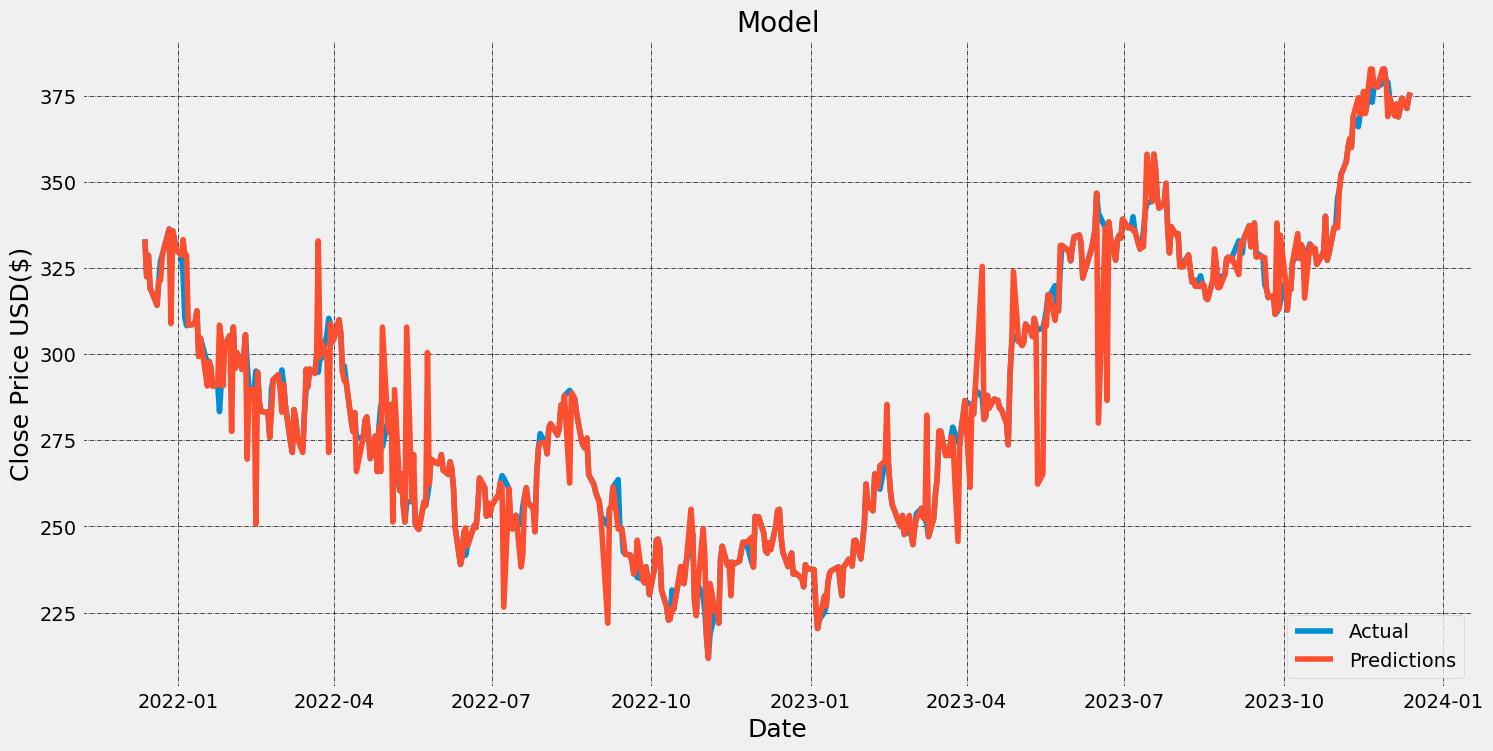

In [10]:
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize = 18)
# plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.grid(which='major',color='k', linestyle='-.',linewidth=0.5)
plt.legend(['Actual', 'Predictions'], loc = 'lower right')
plt.show

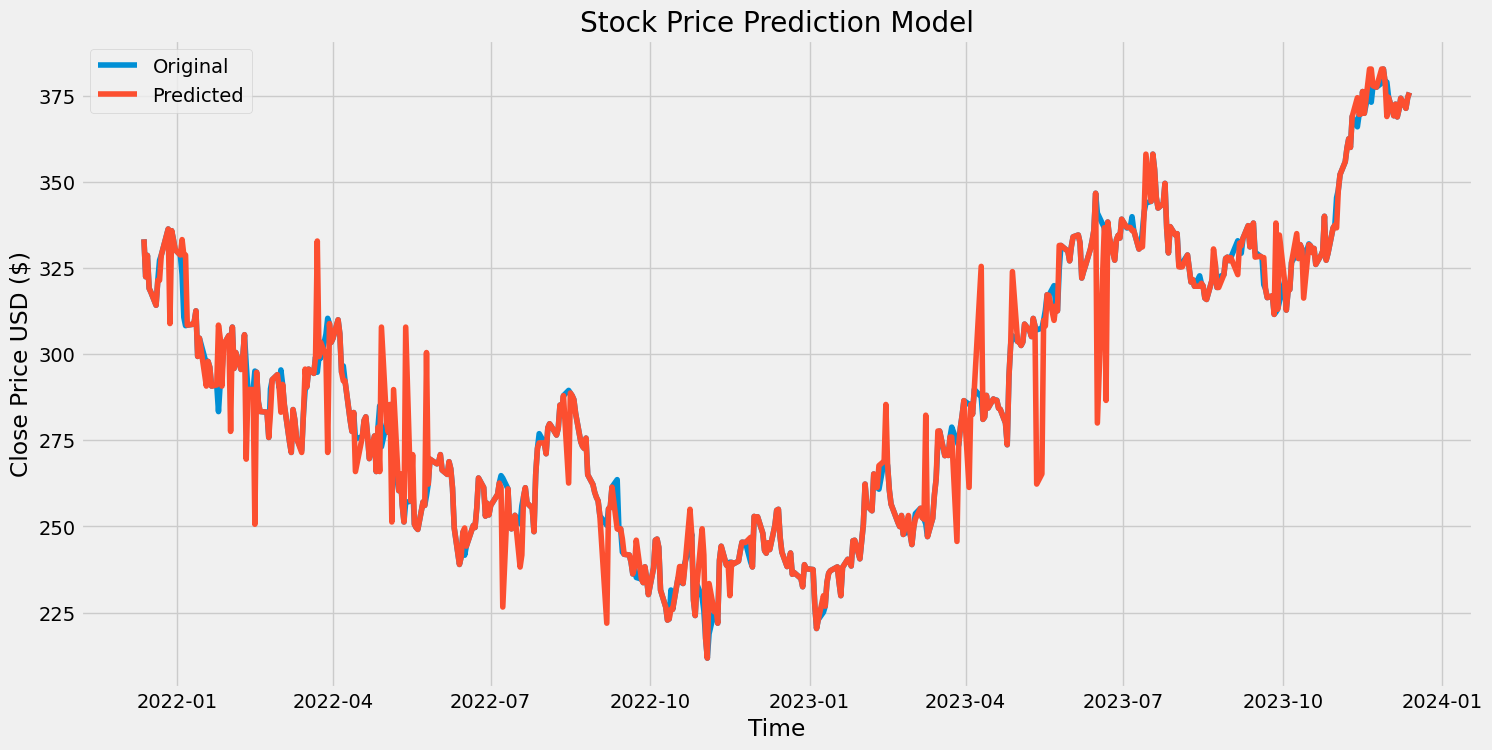

In [11]:
df_prediction = df_prediction[df_prediction.index >= '2022-06-01']


plt.figure(figsize=(16,8))
plt.title("Stock Price Prediction Model")
plt.xlabel('Time')
plt.ylabel('Close Price USD ($)')
# plt.plot(df_prediction['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", 'Predicted'])
plt.show()

# **EVALUATION THE MODEL**

In [12]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.utils import check_array

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate Root Mean Squared Error (RMSE)
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to calculate Test R-squared, Test Explain Variation, Test MAPE, Test MSE, Test RMSE, and Test MAE
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    explain_var = explained_variance_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    return r2, explain_var, mape, mse, rmse, mae

# Use the decision tree model to make predictions on the test set
tree_test_predictions = tree.predict(x_test)

# Evaluate the model using the test set
test_r2, test_explain_var, test_mape, test_mse, test_rmse, test_mae = evaluate_model(y_test, tree_test_predictions)

# Print the results
print(f'Test R-squared: {test_r2:.4f}')
print(f'Test MAPE: {test_mape:.4f}%')
print(f'Test Mean Squared Error (MSE): {test_mse:.4f}')
print(f'Test Root Mean Squared Error (RMSE): {test_rmse:.4f}')
print(f'Test Mean Absolute Error (MAE): {test_mae:.4f}')

Test R-squared: 0.9804
Test MAPE: 6.2002%
Test Mean Squared Error (MSE): 186.7731
Test Root Mean Squared Error (RMSE): 13.6665
Test Mean Absolute Error (MAE): 9.2826


####*NOTE: The decision tree algorithm is quite popular for the interpretability and ease of use. However, one can see that there are limitations: We see spikes going down that might occur when using decision tree algorithms for stock market predition. One reason can be that decision trees are sensitive to outliers in the data. The decison tree may create splits or branches to accommodate these outliers.Moreover, decision trees have a tendency to overfit the training data, capturing specific patterns that might not generalize well to unseen data. Overfitting can lead to spikes in predictions as the model tries to fit the training data too closely.